In [32]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

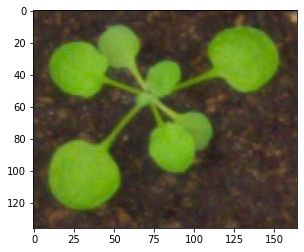

In [43]:
image = plt.imread('plant011_rgb.png')
image.shape
plt.imshow(image)

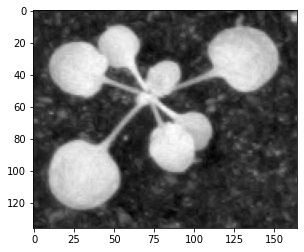

In [44]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [45]:
gray.shape

(136, 165)

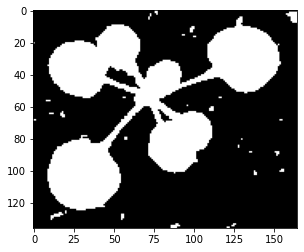

In [46]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

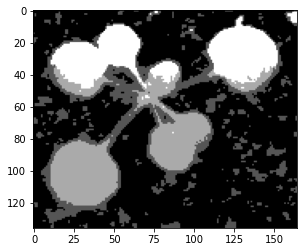

In [47]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

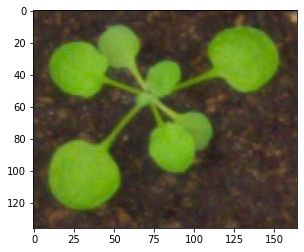

In [49]:
image = plt.imread('plant011_rgb.png')
plt.imshow(image)

In [50]:

# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [51]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

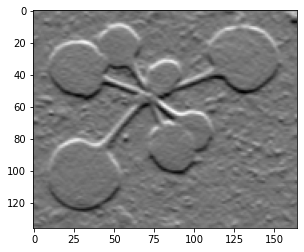

In [52]:
plt.imshow(out_h, cmap='gray')

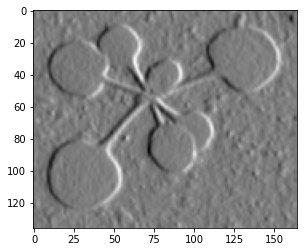

In [53]:
plt.imshow(out_v, cmap='gray')

# Task 2

Task 2.1

In [67]:
ImgPIa=cv2.imread('ImgPIA.jpg')

In [4]:
import cv2
import numpy as np

img = cv2.imread('ImgPIA.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
M = cv2.moments(thresh)
print(M)

{'m00': 102277185.0, 'm10': 90651627645.0, 'm01': 39465299655.0, 'm20': 93218363501295.0, 'm11': 39418592905125.0, 'm02': 22249052937705.0, 'm30': 1.026204504037075e+17, 'm21': 4.3589791996968344e+16, 'm12': 2.3961062266672144e+16, 'm03': 1.4730769691538968e+16, 'mu20': 12870849100231.576, 'mu11': 4439201858887.202, 'mu02': 7020731226866.525, 'mu30': -2817758694577758.5, 'mu21': -249236197178680.53, 'mu12': 815120915795506.8, 'mu03': 727489638832275.2, 'nu20': 0.0012304094724981704, 'nu11': 0.00042437262491159383, 'nu02': 0.0006711580672051271, 'nu30': -2.6635256455900432e-05, 'nu21': -2.3559398619626295e-06, 'nu12': 7.705043968655072e-06, 'nu03': 6.876697119804881e-06}


In [5]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [3]:
import cv2
import numpy as np

filename = 'ImgPIA.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [4]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

In [5]:
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

In [6]:
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

In [9]:
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

Task 2.2

In [2]:
import cv2
import numpy as np

filename = 'ImgPIA.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [8]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

In [16]:
print(res)

[[ 714  453  714  453]
 [ 733    2  733    3]
 [ 789    2  789    3]
 ...
 [1037  897 1035  896]
 [1277  897 1277  896]
 [1317  898 1314  899]]


In [4]:
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [5]:
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [13]:
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)


In [14]:
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imwrite('subpixel5.png',img)

True